In [1]:
%load_ext watermark
%watermark  -d -u -a 'Andreas Mueller, Kyle Kastner, Sebastian Raschka' -v -p numpy,scipy,matplotlib,scikit-learn

Andreas Mueller, Kyle Kastner, Sebastian Raschka 
last updated: 2017-09-10 

CPython 2.7.13
IPython 5.3.0

numpy 1.12.1
scipy 0.19.0
matplotlib 2.0.2
scikit-learn 0.18.1


/home/sunny/anaconda2/lib/python2.7/site-packages/watermark/watermark.py:151: DeprecationWarning: Importing scikit-learn as `scikit-learn` has been depracated and will not be supported anymore in v1.7.0. Please use the package name `sklearn` instead.
  DeprecationWarning)


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# SciPy 2016 Scikit-learn Tutorial

# In Depth -  Support Vector Machines

SVM stands for "support vector machines". They are efficient and easy to use estimators.
They come in two kinds: SVCs, Support Vector Classifiers, for classification problems, and SVRs, Support Vector Regressors, for regression problems.

## Linear SVMs

The SVM module contains LinearSVC, which we already discussed briefly in the section on linear models.
Using ``SVC(kernel="linear")`` will also yield a linear predictor that is only different in minor technical aspects.

## Kernel SVMs
The real power of SVMs lies in using kernels, which allow for non-linear decision boundaries. A kernel defines a similarity measure between data points. The most common are:

- **linear** will give linear decision frontiers. It is the most computationally efficient approach and the one that requires the least amount of data.

- **poly** will give decision frontiers that are polynomial. The order of this polynomial is given by the 'order' argument.

- **rbf** uses 'radial basis functions' centered at each support vector to assemble a decision frontier. The size of the RBFs ultimately controls the smoothness of the decision frontier. RBFs are the most flexible approach, but also the one that will require the largest amount of data.

Predictions in a kernel-SVM are made using the formular

$$
\hat{y} = \text{sign}(\alpha_0 + \sum_{j}\alpha_j y_j k(\mathbf{x^{(j)}}, \mathbf{x}))
$$

where $\mathbf{x}^{(j)}$ are training samples, $\mathbf{y}^{(j)}$ the corresponding labels, $\mathbf{x}$ is a test-sample to predict on, $k$ is the kernel, and $\alpha$ are learned parameters.

What this says is "if $\mathbf{x}$ is similar to $\mathbf{x}^{(j)}$ then they probably have the same label", where the importance of each $\mathbf{x}^{(j)}$ for this decision is learned. [Or something much less intuitive about an infinite dimensional Hilbert-space]

Often only few samples have non-zero $\alpha$, these are called the "support vectors" from which SVMs get their name.
These are the most discriminant samples.

The most important parameter of the SVM is the regularization parameter $C$, which bounds the influence of each individual sample:

- Low C values: many support vectors... Decision frontier = mean(class A) - mean(class B)
- High C values: small number of support vectors: Decision frontier fully driven by most discriminant samples



The other important parameters are those of the kernel. Let's look at the RBF kernel in more detail:

$$k(\mathbf{x}, \mathbf{x'}) = \exp(-\gamma ||\mathbf{x} - \mathbf{x'}||^2)$$

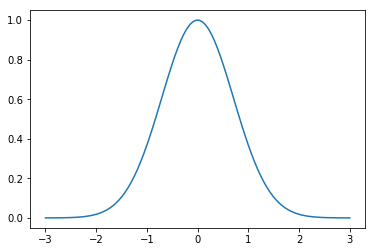

In [3]:
from sklearn.metrics.pairwise import rbf_kernel

line = np.linspace(-3, 3, 100)[:, np.newaxis]
kernel_value = rbf_kernel(line, [[0]], gamma=1)
plt.plot(line, kernel_value);

The rbf kernel has an inverse bandwidth-parameter gamma, where large gamma mean a very localized influence for each data point, and
small values mean a very global influence.
Let's see these two parameters in action:

/home/sunny/anaconda2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


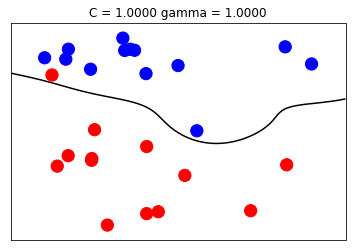

In [4]:
from figures import plot_svm_interactive
plot_svm_interactive()

## Exercise: tune a SVM on the digits dataset

In [5]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC

digits = load_digits()
X_digits, y_digits = digits.data, digits.target

# split the dataset, apply grid-search

In [ ]:
#%load solutions/18_svc_grid.py